In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# load dataset
df = pd.read_csv('data/auto-mpg.csv' '', delim_whitespace=True, header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model_year', 'origin', 'car_name']



/var/folders/9r/0bp7554n0wj8mbzkb2bylhvc0000gn/T/ipykernel_42768/3444487048.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/auto-mpg.csv' '', delim_whitespace=True, header=None)


In [ ]:
# Clean data
df = df.replace('?', np.nan)
df = df.dropna()
df['horsepower'] = df['horsepower'].astype(float)

# Drop non-numeric column
df = df.drop(columns=['car_name'])

print("Dataset loaded ")
print(df.head())

# data exploration
print("\nBasic statistics:")
print(df.describe())



✅ Dataset loaded successfully!
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  

Basic statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.00

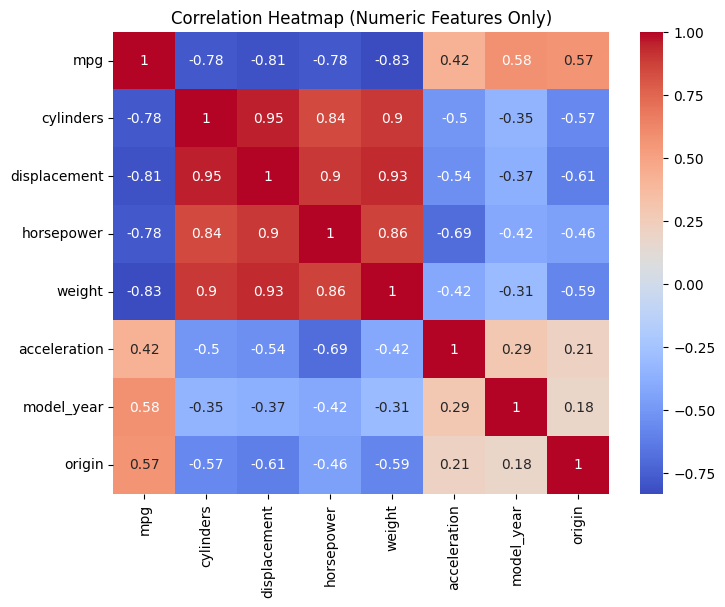

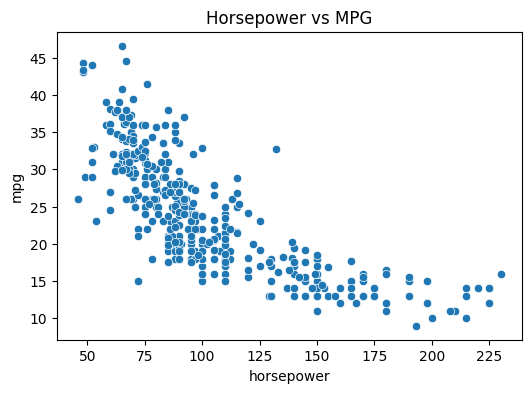

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='horsepower', y='mpg')
plt.title('Horsepower vs MPG')
plt.show()

# feature and target selection
X = df[['horsepower', 'weight', 'cylinders', 'displacement']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [ ]:
#linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nLinear Regression -> RMSE: {rmse:.2f}, R2: {r2:.2f}")

#polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_p, y_train)
y_pred_p = lr_poly.predict(X_test_p)

rmse_p = np.sqrt(mean_squared_error(y_test, y_pred_p))
r2_p = r2_score(y_test, y_pred_p)

print(f"Polynomial Regression -> RMSE: {rmse_p:.2f}, R2: {r2_p:.2f}")






Linear Regression -> RMSE: 4.23, R2: 0.65
Polynomial Regression -> RMSE: 4.13, R2: 0.67


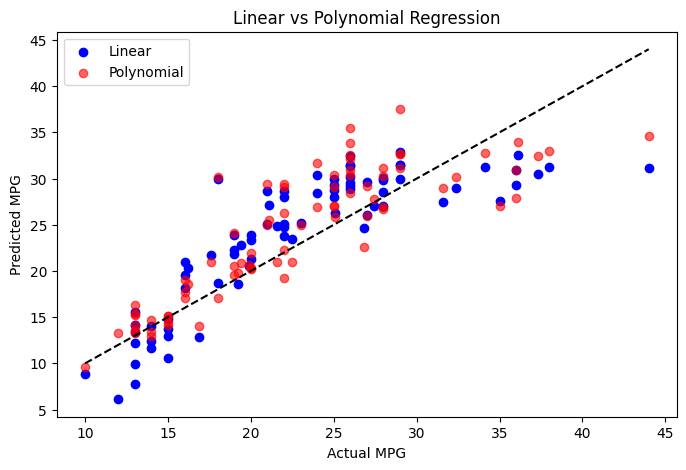

In [ ]:
#plot comparison
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, label='Linear', color='blue')
plt.scatter(y_test, y_pred_p, label='Polynomial', color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.title('Linear vs Polynomial Regression')
plt.show()